<a href="https://colab.research.google.com/github/srirangan9224/ML-practice/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch # imports pytorch
import numpy as np
# works similiarly and is compatible with pytorch

In [ ]:
a = torch.ones(10) # is wrapped as a tensor
print(type(a))
a = np.ones(10) # is wrapped as an array
print(type(a))

# use from_numpy to convert from numpy to torch
torch.from_numpy(a)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)

In [ ]:
# create arrays/tensors in pytorch
tensor_1 = torch.tensor((1,2,3,4))
tensor_2 = torch.tensor((4.))
tensor_3 = torch.tensor(((1,2),(3,4)))

print(tensor_1,tensor_2,tensor_3)

tensor([1, 2, 3, 4]) tensor(4.) tensor([[1, 2],
        [3, 4]])


**Datasets**

In [ ]:
# creating datasets in pytorch
from torch.utils.data import Dataset,DataLoader

class Quadratic_dataset(Dataset):
  def __init__(self):
    self.x = torch.linspace(-10,10,1000).reshape((1000,1)) # create a tensor and then reshape into a matrix of the given shape
    self.y = self.x ** 2 # perform the operation of sqauring the values in self.x

  def __len__(self): # overload the len function
    return self.x.shape[0]

  def __getitem__(self,index): # overload indices
    return self.x[index],self.y[index]

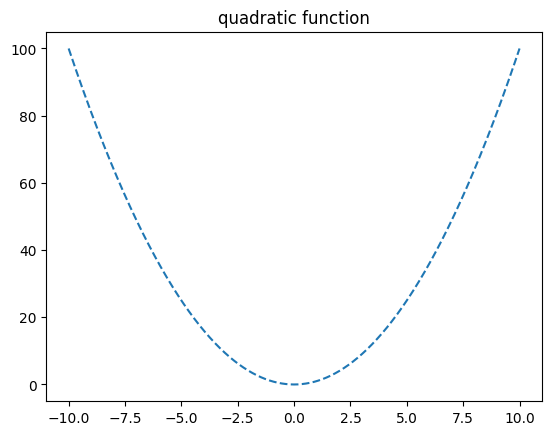

In [ ]:
# testing the dataset
import matplotlib.pyplot as plt

dataset = Quadratic_dataset()

plt.plot(dataset.x,dataset.y, ls="--") # ls is the attribute that controls wheter the plot is continuous or dotted or lines

plt.title("quadratic function")

plt.show()

In [ ]:
# loading data using Dataloader

BATCH_SIZE = 10

dataloader = DataLoader(dataset,batch_size=BATCH_SIZE, shuffle=True)

for x,y in dataloader:
  x,y # prints the data created into batch size sized sets of x and y values

In [ ]:
# create a new model for learning
from torch import nn

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel,self).__init__() # initialzes the given class as a pytroch nn module
    self.fc1 = nn.Linear(1,100) # create a fully connected layer in pytorch
    self.act1 = nn.ReLU() # creates a RELU (Rectfied linear unit) activation function
    self.fc2 = nn.Linear(100,1) # create another fully connected layer
    self.act2 = nn.ReLU()

  def forward(self,x):
    out = self.fc1(x)
    out = self.act1(out)
    out = self.fc2(out)
    out = self.act2(out)
    return out

In [ ]:
# test the model

model = MyModel()
model(torch.tensor([5.]))

tensor([0.5112], grad_fn=<ReluBackward0>)

In [ ]:
# training a model

from tqdm import tqdm # function in the tqdm module print a progress bar to show how much of the epoch is done.

LEARNING_RATE = 1e-3 # the rate at which the model learns stuff
EPOCH = 100 # visits every singe data points 100 times

loss = nn.MSELoss() # define a loss function based on Mean Squared error loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # define an optimizer function called Adam

epoch_losses = []


for epoch in tqdm(range(EPOCH)):
  epoch_loss = 0
  for x,y in dataloader:
    y_pred = model(x)
    y_loss = loss(y_pred,y)
    y_loss.backward() # backpropogates throught the nn
    optimizer.step() # updates the values based on the loss
    optimizer.zero_grad() # zeros the gradient after updating the variables
    epoch_loss += y_loss.item()
  epoch_losses.append(epoch_loss/len(dataloader))


100%|██████████| 100/100 [00:14<00:00,  6.82it/s]


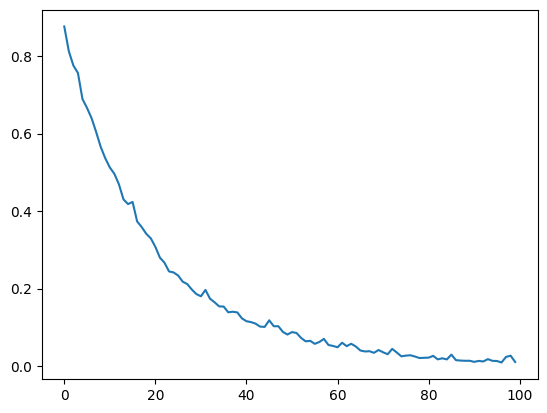

In [ ]:
# plot the losses on a graph
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(EPOCH),epoch_losses)